In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline  


In [2]:
df = pd.read_excel("D:\\A-DATA TECH & VOR DEM AUGUST\\project\\P_Data_Extract_From_World_Development_Indicators-.xlsx")


In [3]:
df.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'Electricity production from oil, gas and coal sources (% of total)',
       'Renewable electricity output (% of total electricity output)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Electricity production from nuclear sources (% of total)',
       'Access to electricity (% of population)',
       'Energy use (kg of oil equivalent per capita)',
       'GDP per capita (constant 2015 US$)', 'GDP growth (annual %)',
       'Net official development assistance received (current US$)',
       'Total reserves (includes gold, current US$)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)',
       'Urban population (% of total population)', 'Population, total',
       'Forest area (% of land area)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country Name                                                            818 non-null    object 
 1   Country Code                                                            816 non-null    object 
 2   Time                                                                    816 non-null    float64
 3   Time Code                                                               816 non-null    object 
 4   Electricity production from oil, gas and coal sources (% of total)      816 non-null    object 
 5   Renewable electricity output (% of total electricity output)            816 non-null    object 
 6   Renewable energy consumption (% of total final energy consumption)      816 non-nu

In [5]:
df.isnull().sum()


Country Name                                                              3
Country Code                                                              5
Time                                                                      5
Time Code                                                                 5
Electricity production from oil, gas and coal sources (% of total)        5
Renewable electricity output (% of total electricity output)              5
Renewable energy consumption (% of total final energy consumption)        5
Electricity production from nuclear sources (% of total)                  5
Access to electricity (% of population)                                   5
Energy use (kg of oil equivalent per capita)                              5
GDP per capita (constant 2015 US$)                                        5
GDP growth (annual %)                                                     5
Net official development assistance received (current US$)                5
Total reserv

In [6]:
df.isnull().sum() / len(df) * 100


Country Name                                                              0.365408
Country Code                                                              0.609013
Time                                                                      0.609013
Time Code                                                                 0.609013
Electricity production from oil, gas and coal sources (% of total)        0.609013
Renewable electricity output (% of total electricity output)              0.609013
Renewable energy consumption (% of total final energy consumption)        0.609013
Electricity production from nuclear sources (% of total)                  0.609013
Access to electricity (% of population)                                   0.609013
Energy use (kg of oil equivalent per capita)                              0.609013
GDP per capita (constant 2015 US$)                                        0.609013
GDP growth (annual %)                                                     0.609013
Net 

In [7]:
df.describe()


,Time,GDP per capita (constant 2015 US$),GDP growth (annual %),Population growth (annual %),Urban population (% of total population),"Population, total"
count,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02
mean,2011.500000,28137.650783,3.325673,1.058464,72.189343,1.342206e+08
std,6.926432,21272.172070,3.741602,1.237364,17.623915,3.025249e+08
min,2000.000000,718.342906,-10.940071,-4.170336,27.667000,3.493575e+06
25%,2005.750000,8429.821951,1.403664,0.433336,59.137500,9.741478e+06
50%,2011.500000,29794.990912,3.032506,0.856003,77.634500,3.825335e+07
75%,2017.250000,43523.889133,5.312993,1.382232,84.323000,8.254549e+07
max,2023.000000,99677.473102,24.615570,11.589980,100.000000,1.438070e+09


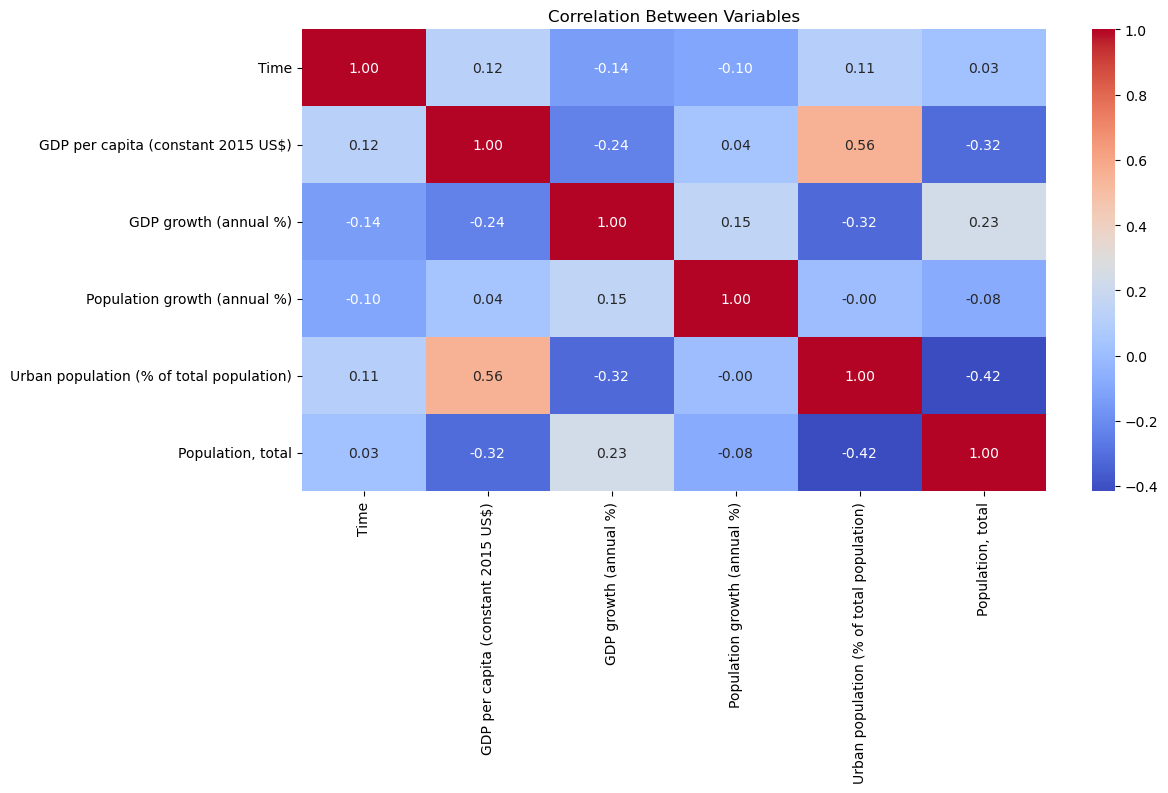

In [11]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()


In [95]:

df.replace("..", np.nan, inplace=True)


numeric_columns = [
    "Access to electricity (% of population)", 
    "Energy use (kg of oil equivalent per capita)", 
    "GDP per capita (constant 2015 US$)",
    "Renewable electricity output (% of total electricity output)",
    "Population density (people per sq. km of land area)",
    "Urban population (% of total population)"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")


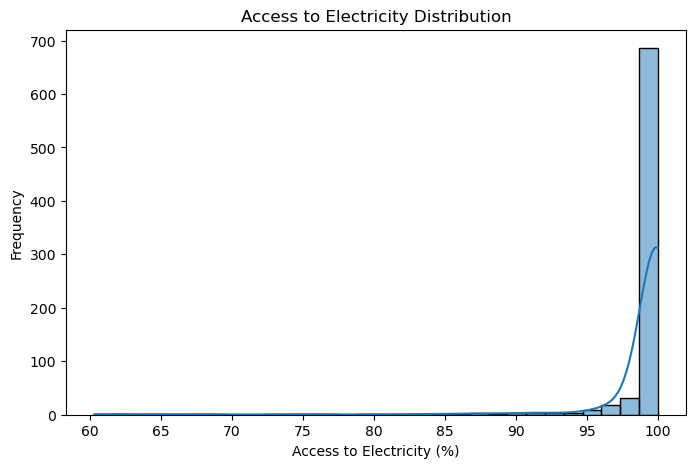

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["Access to electricity (% of population)"].dropna(), kde=True, bins=30)
plt.title("Access to Electricity Distribution")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Frequency")
plt.show()


In [97]:
df_turkey[["Time", "Renewable electricity output (% of total electricity output)"]].isnull().sum()


Time                                                            0
Renewable electricity output (% of total electricity output)    0
dtype: int64

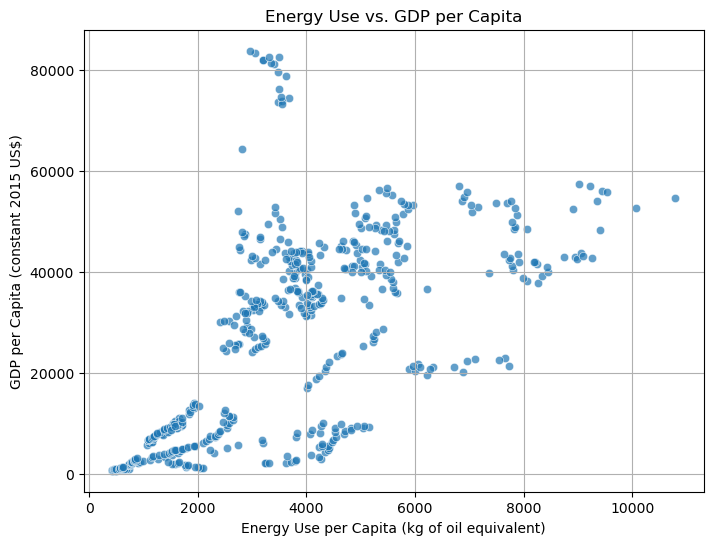

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Energy use (kg of oil equivalent per capita)", y="GDP per capita (constant 2015 US$)", alpha=0.7)
plt.title("Energy Use vs. GDP per Capita")
plt.xlabel("Energy Use per Capita (kg of oil equivalent)")
plt.ylabel("GDP per Capita (constant 2015 US$)")
plt.grid(True)
plt.show()


In [21]:
df[["Energy use (kg of oil equivalent per capita)", "GDP per capita (constant 2015 US$)"]].dtypes


Energy use (kg of oil equivalent per capita)    float64
GDP per capita (constant 2015 US$)              float64
dtype: object

In [22]:
df["Energy use (kg of oil equivalent per capita)"] = pd.to_numeric(df["Energy use (kg of oil equivalent per capita)"], errors="coerce")
df["GDP per capita (constant 2015 US$)"] = pd.to_numeric(df["GDP per capita (constant 2015 US$)"], errors="coerce")


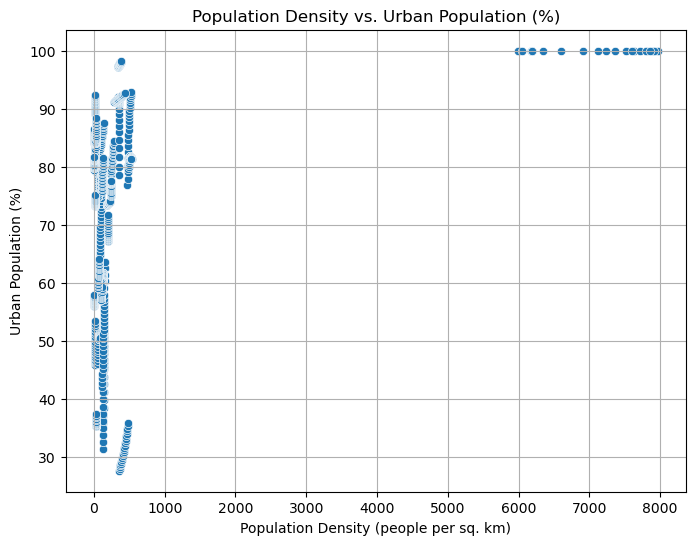

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Population density (people per sq. km of land area)", y="Urban population (% of total population)")
plt.title("Population Density vs. Urban Population (%)")
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Urban Population (%)")
plt.grid(True)
plt.show()


In [25]:
pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----------- ---------------------------- 92.2/323.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/16.2 MB 5.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/16.2 MB 5.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/16.2 MB 6.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.2 MB 6.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.2 MB 6.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.2 MB 6.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.2 MB 6.7 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/16.2 MB 6.7 MB/s eta 0:00:03
   ------ --------------------------------- 2.8/16.2 MB 7.1 MB/s eta 0:00:02
   ----

In [34]:
import geopandas as gpd


url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)


world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [36]:


df.replace("..", np.nan, inplace=True)



In [37]:

df["Electricity production from oil, gas and coal sources (% of total)"] = pd.to_numeric(
    df["Electricity production from oil, gas and coal sources (% of total)"], errors="coerce"
)



In [38]:

merged = world.merge(df, how="left", left_on="ADMIN", right_on="Country Name")



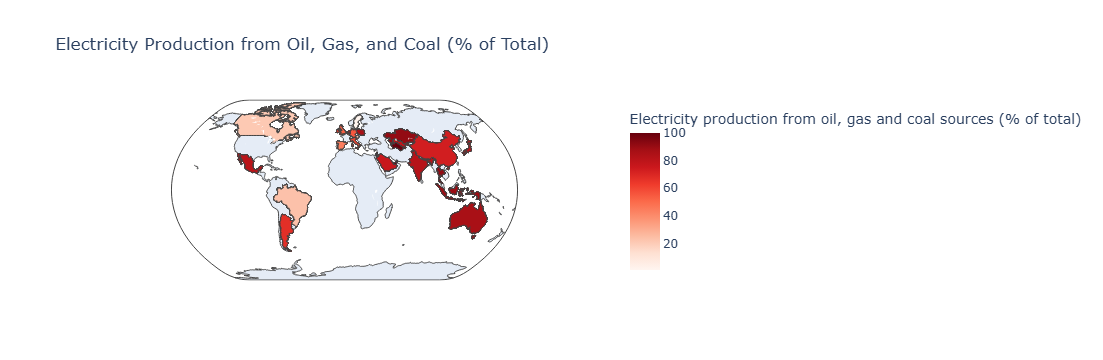

In [39]:

fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Electricity production from oil, gas and coal sources (% of total)",
    hover_name="Country Name",
    title="Electricity Production from Oil, Gas, and Coal (% of Total)",
    color_continuous_scale="Reds",
    projection="natural earth"
)

fig.show()


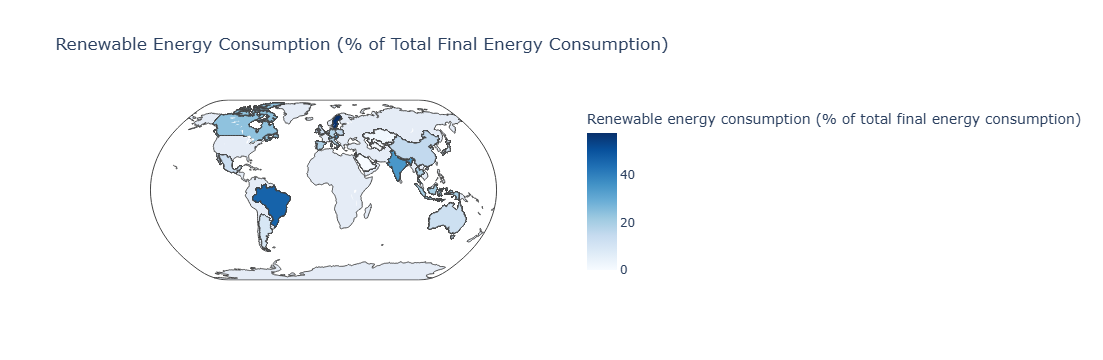

In [40]:
fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Renewable energy consumption (% of total final energy consumption)",
    hover_name="Country Name",
    title="Renewable Energy Consumption (% of Total Final Energy Consumption)",
    color_continuous_scale="Blues",
    projection="natural earth"
)

fig.show()


In [41]:
print(set(df["Country Name"]) - set(world["ADMIN"]))


{'Last Updated: 01/28/2025', 'Kyrgyz Republic', 'Turkiye', 'United States', 'Russian Federation', nan, 'Singapore', 'Korea, Rep.', 'Data from database: World Development Indicators'}


In [43]:
df.replace("..", np.nan, inplace=True)

In [44]:
df["Electricity production from oil, gas and coal sources (% of total)"] = pd.to_numeric(
    df["Electricity production from oil, gas and coal sources (% of total)"], errors="coerce"
)

In [45]:
df_clean = df.dropna(subset=["Electricity production from oil, gas and coal sources (% of total)"])


In [46]:
top_countries = df_clean.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")


C:\Users\musta\AppData\Local\Temp\ipykernel_12536\3977776374.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




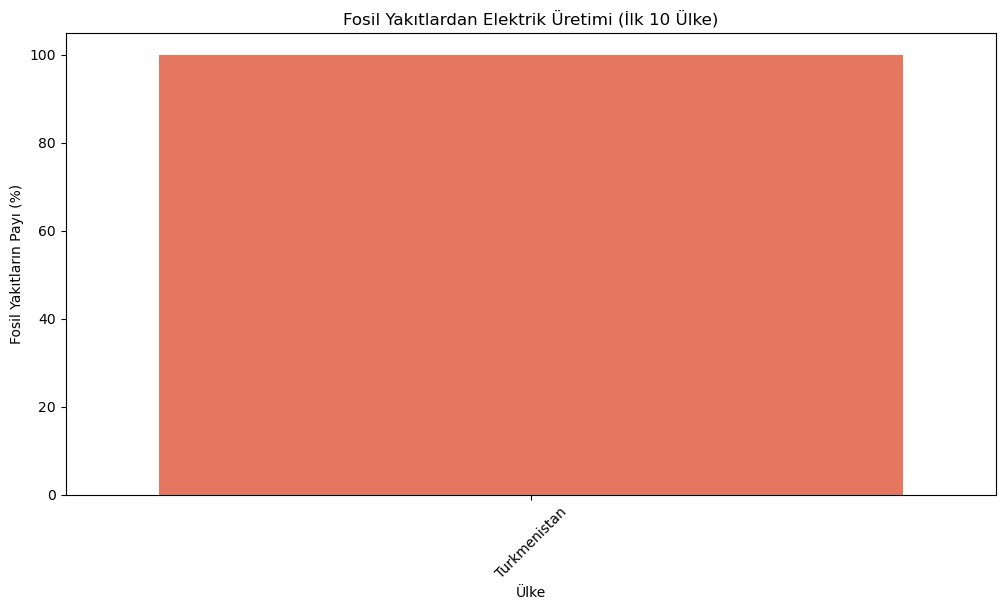

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x="Country Name", y="Electricity production from oil, gas and coal sources (% of total)", palette="Reds")
plt.xticks(rotation=45)
plt.title("Fosil Yakıtlardan Elektrik Üretimi (İlk 10 Ülke)")
plt.xlabel("Ülke")
plt.ylabel("Fosil Yakıtların Payı (%)")
plt.show()

In [48]:
print(df["Electricity production from oil, gas and coal sources (% of total)"].isna().sum())


277


In [49]:
missing_countries = df[df["Electricity production from oil, gas and coal sources (% of total)"].isna()]["Country Name"].unique()
print("Verisi Eksik Olan Ülkeler:")
print(missing_countries)


Verisi Eksik Olan Ülkeler:
['China' 'United States' 'Turkiye' 'Thailand' 'Turkmenistan'
 'United Arab Emirates' 'Uzbekistan' 'Mexico' 'Netherlands' 'Poland'
 'Saudi Arabia' 'Russian Federation' 'Singapore' 'Spain' 'United Kingdom'
 'Kazakhstan' 'Kyrgyz Republic' 'Korea, Rep.' 'Japan' 'Italy' 'Indonesia'
 'Israel' 'Brazil' 'Australia' 'Austria' 'Argentina' 'Ireland' 'Sweden'
 'Switzerland' 'Belgium' 'Canada' 'Germany' 'India' 'France' nan
 'Data from database: World Development Indicators'
 'Last Updated: 01/28/2025']


In [50]:
df["Electricity production from oil, gas and coal sources (% of total)"] = df["Electricity production from oil, gas and coal sources (% of total)"].fillna(df["Electricity production from oil, gas and coal sources (% of total)"].mean())


In [52]:
missing_count = df["Electricity production from oil, gas and coal sources (% of total)"].isna().sum()
total_count = len(df)
print(f"Toplam veri sayısı: {total_count}")
print(f"Eksik veri sayısı: {missing_count}")
print(f"Eksik veri oranı: {missing_count / total_count * 100:.2f}%")


Toplam veri sayısı: 821
Eksik veri sayısı: 0
Eksik veri oranı: 0.00%


In [53]:
print(df["Electricity production from oil, gas and coal sources (% of total)"].head(20))


0     82.125971
1     79.861697
2     80.862357
3     82.694642
4     81.486334
5     81.701851
6     82.493613
7     82.843479
8     80.289947
9     80.248373
10    79.401025
11    81.174003
12    77.859893
13    77.424467
14    74.822887
15    72.962076
16    65.122316
17    65.122316
18    65.122316
19    65.122316
Name: Electricity production from oil, gas and coal sources (% of total), dtype: float64


In [54]:
top_countries = df.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")
print(top_countries[["Country Name", "Electricity production from oil, gas and coal sources (% of total)"]])


     Country Name  \
96   Turkmenistan   
97   Turkmenistan   
98   Turkmenistan   
99   Turkmenistan   
100  Turkmenistan   
101  Turkmenistan   
102  Turkmenistan   
103  Turkmenistan   
104  Turkmenistan   
105  Turkmenistan   

     Electricity production from oil, gas and coal sources (% of total)  
96                                               100.0                   
97                                               100.0                   
98                                               100.0                   
99                                               100.0                   
100                                              100.0                   
101                                              100.0                   
102                                              100.0                   
103                                              100.0                   
104                                              100.0                   
105                         

In [55]:
df["Electricity production from oil, gas and coal sources (% of total)"].fillna(
    df["Electricity production from oil, gas and coal sources (% of total)"].mean(), inplace=True
)


top_countries = df.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")
print(top_countries[["Country Name", "Electricity production from oil, gas and coal sources (% of total)"]])


     Country Name  \
96   Turkmenistan   
97   Turkmenistan   
98   Turkmenistan   
99   Turkmenistan   
100  Turkmenistan   
101  Turkmenistan   
102  Turkmenistan   
103  Turkmenistan   
104  Turkmenistan   
105  Turkmenistan   

     Electricity production from oil, gas and coal sources (% of total)  
96                                               100.0                   
97                                               100.0                   
98                                               100.0                   
99                                               100.0                   
100                                              100.0                   
101                                              100.0                   
102                                              100.0                   
103                                              100.0                   
104                                              100.0                   
105                         

C:\Users\musta\AppData\Local\Temp\ipykernel_12536\1984399398.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [56]:

latest_year = df["Time"].max()


df_latest = df[df["Time"] == latest_year]


top_countries = df_latest.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")

print(top_countries[["Country Name", "Time", "Electricity production from oil, gas and coal sources (% of total)"]])


             Country Name    Time  \
23                  China  2023.0   
47          United States  2023.0   
71                Turkiye  2023.0   
95               Thailand  2023.0   
119          Turkmenistan  2023.0   
143  United Arab Emirates  2023.0   
167            Uzbekistan  2023.0   
191                Mexico  2023.0   
215           Netherlands  2023.0   
239                Poland  2023.0   

     Electricity production from oil, gas and coal sources (% of total)  
23                                           65.122316                   
47                                           65.122316                   
71                                           65.122316                   
95                                           65.122316                   
119                                          65.122316                   
143                                          65.122316                   
167                                          65.122316                   


In [57]:

df_mean = df.groupby("Country Name", as_index=False).agg({
    "Electricity production from oil, gas and coal sources (% of total)": "mean"
})


top_countries = df_mean.nlargest(10, "Electricity production from oil, gas and coal sources (% of total)")


print(top_countries)


            Country Name  \
31          Turkmenistan   
32  United Arab Emirates   
13                Israel   
25             Singapore   
22                Poland   
29              Thailand   
1              Australia   
16            Kazakhstan   
11             Indonesia   
21           Netherlands   

    Electricity production from oil, gas and coal sources (% of total)  
31                                          88.374105                   
32                                          88.349737                   
13                                          87.926521                   
25                                          86.635040                   
22                                          84.559945                   
29                                          83.614480                   
1                                           81.925253                   
16                                          80.681659                   
11                                

C:\Users\musta\AppData\Local\Temp\ipykernel_12536\3175691283.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




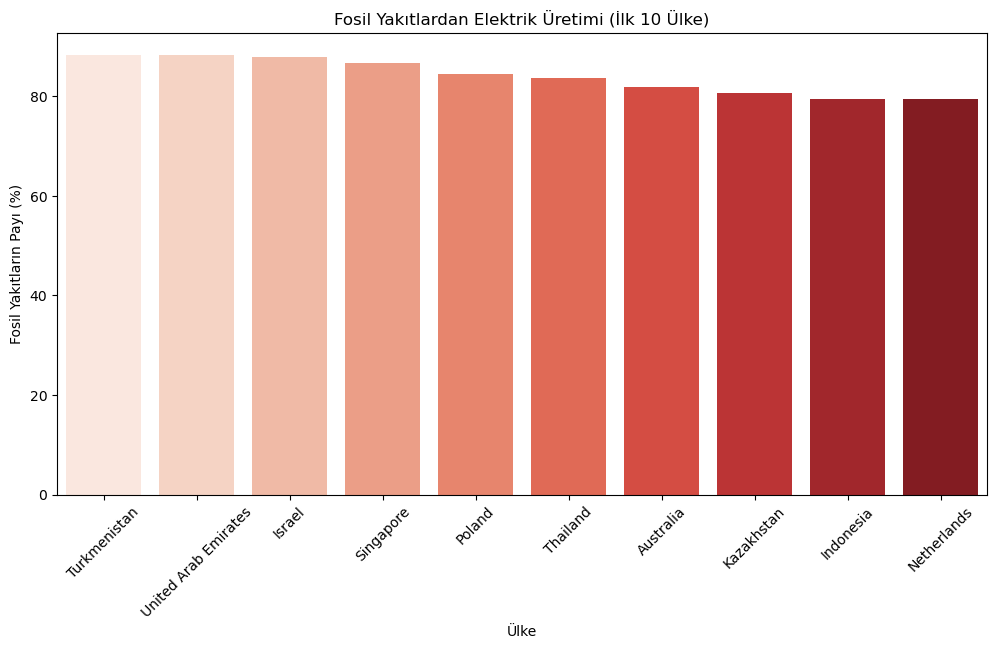

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x="Country Name", y="Electricity production from oil, gas and coal sources (% of total)", palette="Reds")
plt.xticks(rotation=45)
plt.title("Fosil Yakıtlardan Elektrik Üretimi (İlk 10 Ülke)")
plt.xlabel("Ülke")
plt.ylabel("Fosil Yakıtların Payı (%)")
plt.show()


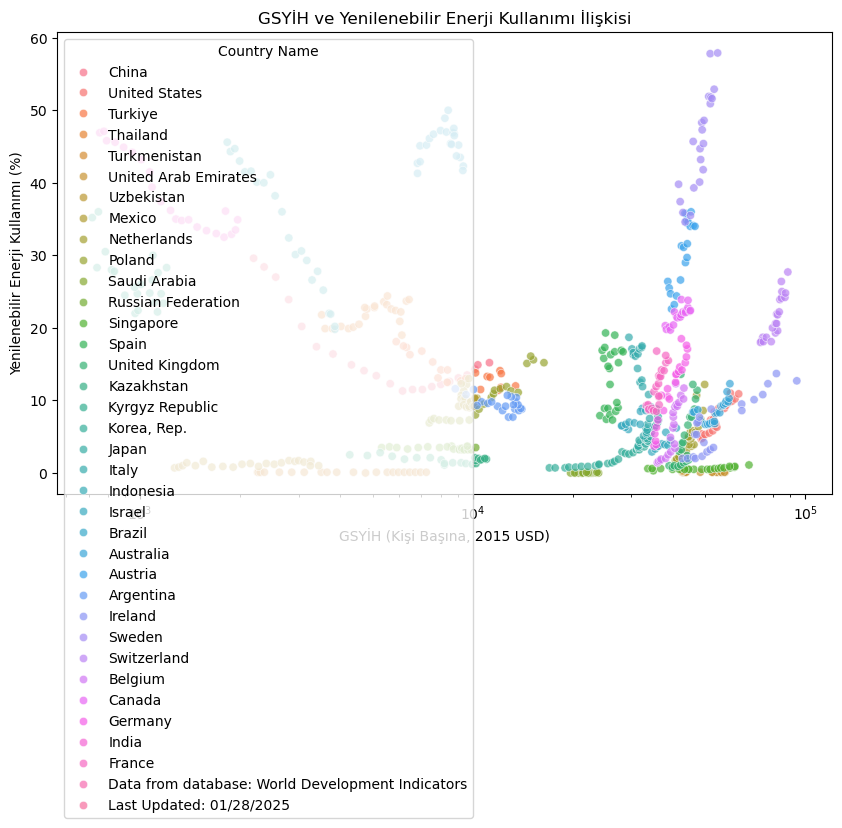

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="GDP per capita (constant 2015 US$)", y="Renewable energy consumption (% of total final energy consumption)", hue="Country Name", alpha=0.7)
plt.xscale("log")  # GSYİH çok değişken olduğu için log ölçek kullan
plt.title("GSYİH ve Yenilenebilir Enerji Kullanımı İlişkisi")
plt.xlabel("GSYİH (Kişi Başına, 2015 USD)")
plt.ylabel("Yenilenebilir Enerji Kullanımı (%)")
plt.show()


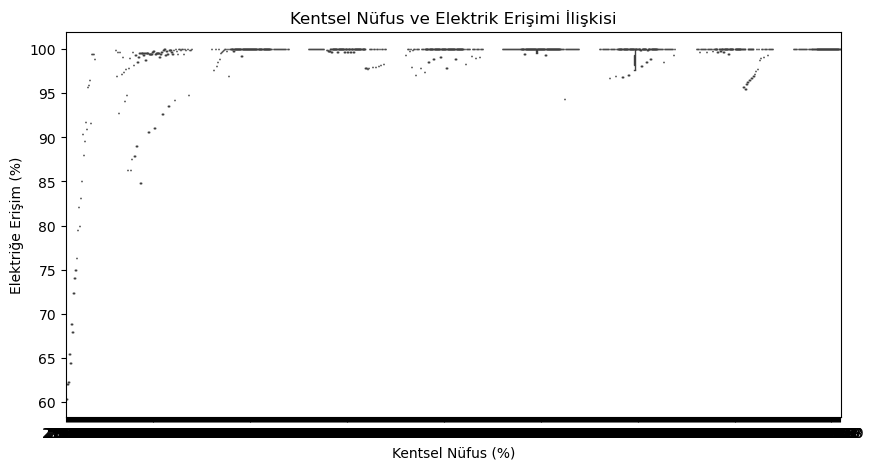

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Urban population (% of total population)", y="Access to electricity (% of population)")
plt.title("Kentsel Nüfus ve Elektrik Erişimi İlişkisi")
plt.xlabel("Kentsel Nüfus (%)")
plt.ylabel("Elektriğe Erişim (%)")
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx

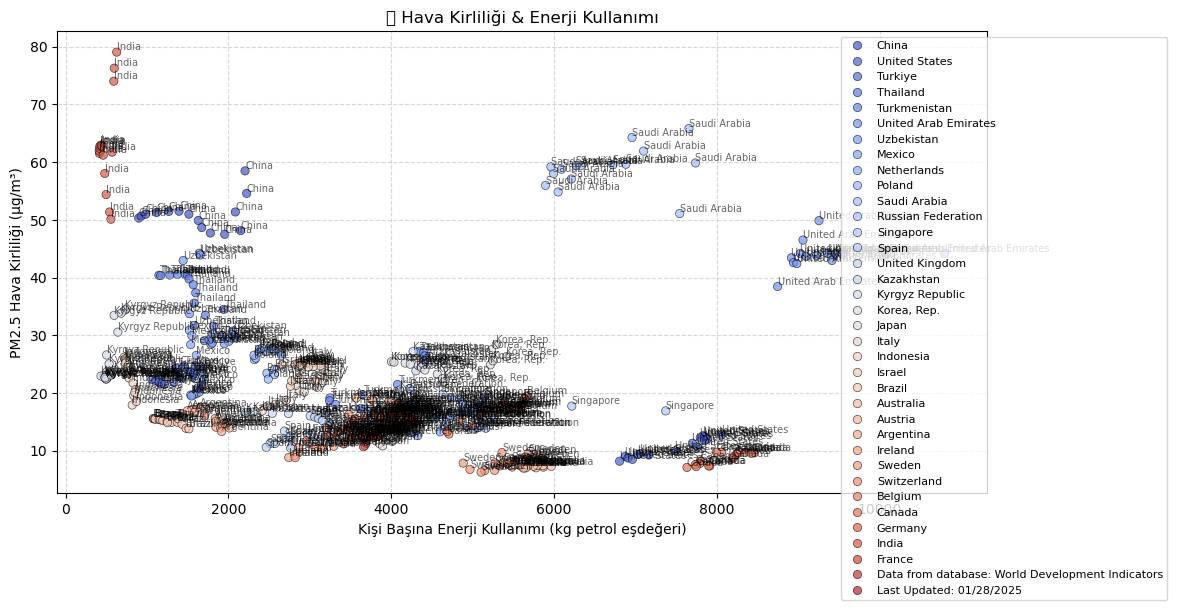

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


ax = sns.scatterplot(data=df, 
                     x="Energy use (kg of oil equivalent per capita)", 
                     y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", 
                     hue="Country Name", 
                     palette="coolwarm", alpha=0.7, edgecolor='black')


for i in range(len(df)):
    plt.text(df["Energy use (kg of oil equivalent per capita)"].iloc[i],  
             df["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"].iloc[i],  
             df["Country Name"].iloc[i],  
             fontsize=7, ha='left', va='bottom', alpha=0.6)  # Fontu küçült, şeffaf yap


plt.title(" Hava Kirliliği & Enerji Kullanımı", fontsize=12)
plt.xlabel("Kişi Başına Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.ylabel("PM2.5 Hava Kirliliği (µg/m³)", fontsize=10)


plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [66]:

df_clean = df.dropna(subset=["Energy use (kg of oil equivalent per capita)", 
                              "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"])
df_clean = df_clean[~df_clean.isin([float('inf'), float('-inf')]).any(axis=1)]  # Sonsuz değerleri temizle


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.



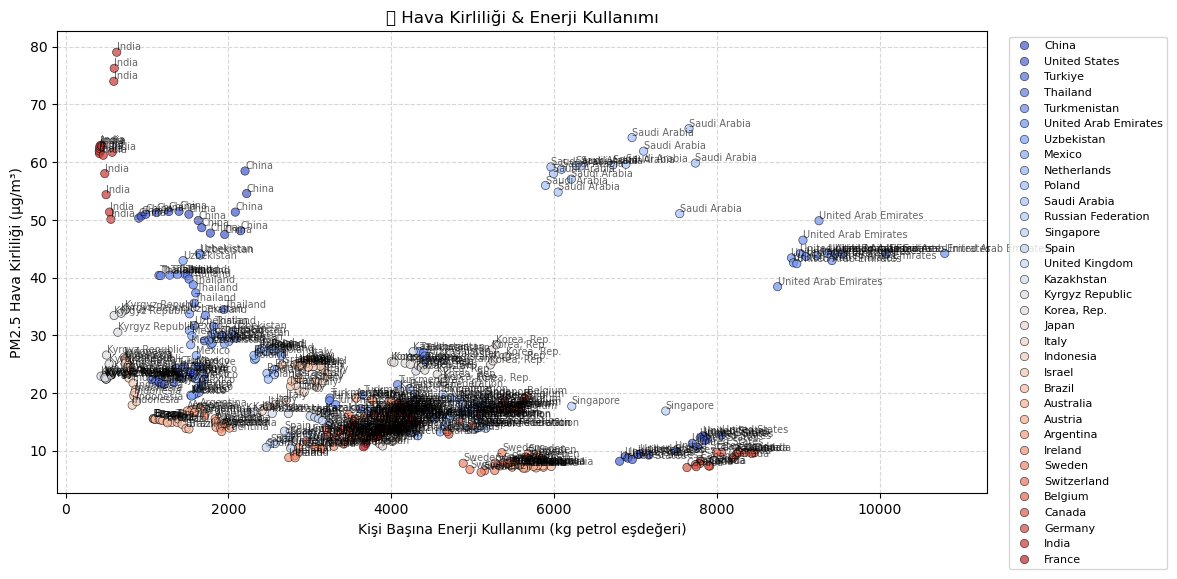

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


ax = sns.scatterplot(data=df_clean, 
                     x="Energy use (kg of oil equivalent per capita)", 
                     y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", 
                     hue="Country Name", 
                     palette="coolwarm", alpha=0.7, edgecolor='black')


for i in range(len(df_clean)):
    plt.text(df_clean["Energy use (kg of oil equivalent per capita)"].iloc[i],  
             df_clean["PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"].iloc[i],  
             df_clean["Country Name"].iloc[i],  
             fontsize=7, ha='left', va='bottom', alpha=0.6)  


plt.title("Hava Kirliliği & Enerji Kullanımı", fontsize=12)
plt.xlabel("Kişi Başına Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.ylabel("PM2.5 Hava Kirliliği (µg/m³)", fontsize=10)

plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



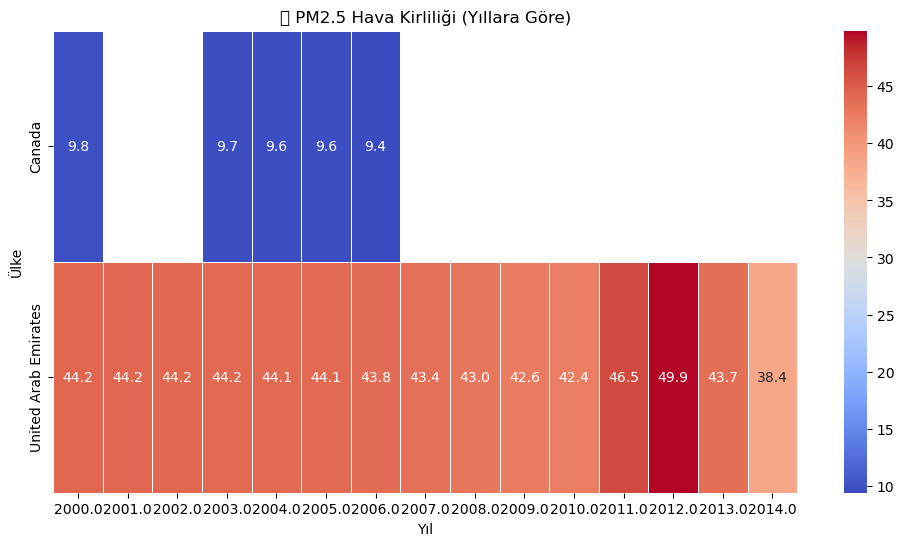

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_clean = df.dropna(subset=["Energy use (kg of oil equivalent per capita)", 
                              "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"])
df_clean = df_clean[~df_clean.isin([float('inf'), float('-inf')]).any(axis=1)]


top_20 = df_clean.nlargest(20, "Energy use (kg of oil equivalent per capita)")


heatmap_data = top_20.pivot(index="Country Name", 
                             columns="Time", 
                             values="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("🌍 PM2.5 Hava Kirliliği (Yıllara Göre)", fontsize=12)
plt.xlabel("Yıl", fontsize=10)
plt.ylabel("Ülke", fontsize=10)
plt.show()


In [69]:
import pandas as pd


continent_dict = {
    "Africa": ["Algeria", "Angola", "Egypt", "Nigeria", "South Africa", "Kenya", "Ethiopia", "Morocco", "Ghana", "Sudan"],
    "Asia": ["China", "India", "Japan", "Indonesia", "Iran", "Pakistan", "Turkey", "South Korea", "Saudi Arabia", "Thailand"],
    "Europe": ["Germany", "France", "United Kingdom", "Italy", "Spain", "Netherlands", "Sweden", "Switzerland", "Russia", "Poland"],
    "North America": ["United States", "Canada", "Mexico", "Cuba", "Guatemala", "Honduras", "Panama", "Jamaica", "Costa Rica"],
    "South America": ["Brazil", "Argentina", "Colombia", "Chile", "Venezuela", "Peru", "Ecuador", "Bolivia", "Paraguay", "Uruguay"],
    "Oceania": ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Solomon Islands"]
}


def get_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return "Other" 

df["Continent"] = df["Country Name"].apply(get_continent)


print(df[["Country Name", "Continent"]].head(10))



  Country Name Continent
0        China      Asia
1        China      Asia
2        China      Asia
3        China      Asia
4        China      Asia
5        China      Asia
6        China      Asia
7        China      Asia
8        China      Asia
9        China      Asia


In [72]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_grouped_energy, x="Continent", y="Energy use (kg of oil equivalent per capita)", palette="viridis")


plt.xticks(fontsize=10)  
plt.yticks(fontsize=9)   

plt.title("🌍 Kıtalara Göre Ortalama Enerji Kullanımı", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Kişi Başına Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.show()


NameError: name 'df_grouped_energy' is not defined

<Figure size 1000x600 with 0 Axes>

C:\Users\musta\AppData\Local\Temp\ipykernel_12536\480722039.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



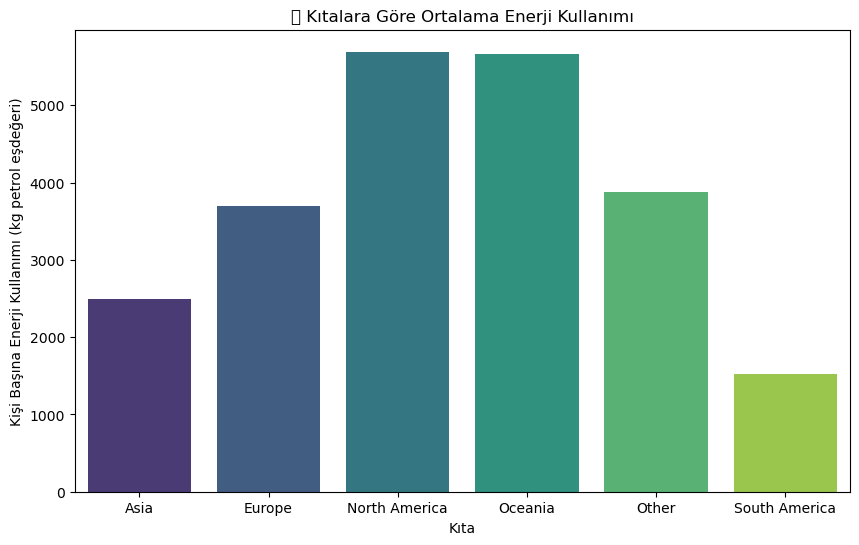

In [73]:

df_grouped_energy = df.groupby("Continent", as_index=False)["Energy use (kg of oil equivalent per capita)"].mean()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_energy, x="Continent", y="Energy use (kg of oil equivalent per capita)", palette="viridis")

plt.title("🌍 Kıtalara Göre Ortalama Enerji Kullanımı", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Kişi Başına Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128268 (\N{ELECTRIC PLUG}) missing from current font.



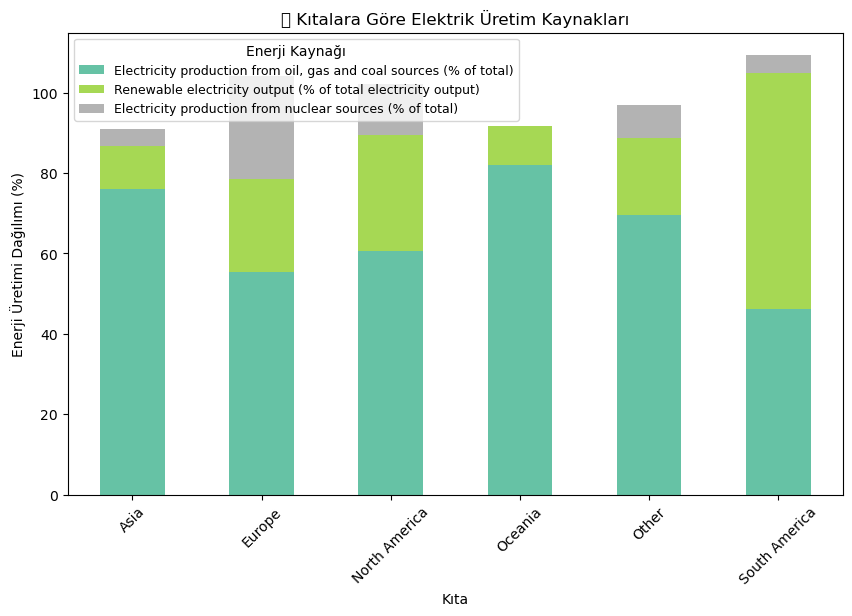

In [75]:

df_energy = df.groupby("Continent", as_index=False)[[
    "Electricity production from oil, gas and coal sources (% of total)",
    "Renewable electricity output (% of total electricity output)",
    "Electricity production from nuclear sources (% of total)"
]].mean()


df_energy.set_index("Continent").plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")

plt.title("🔌 Kıtalara Göre Elektrik Üretim Kaynakları", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Enerji Üretimi Dağılımı (%)", fontsize=10)
plt.legend(title="Enerji Kaynağı", fontsize=9)
plt.xticks(rotation=45, fontsize=10)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from current font.



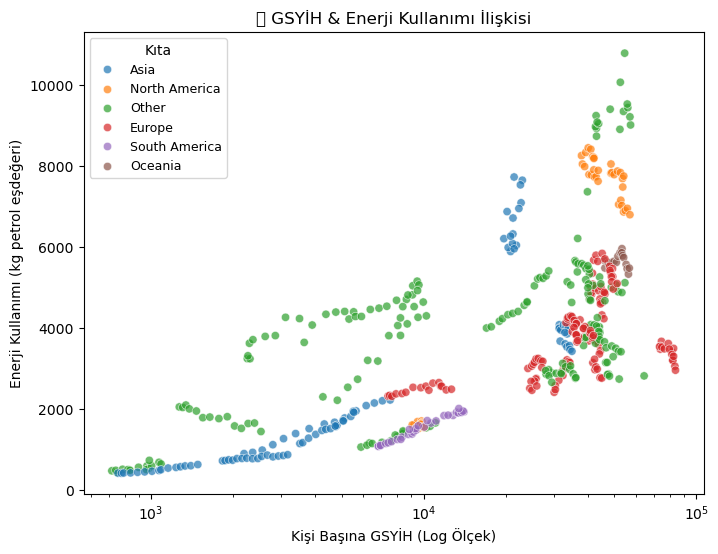

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="GDP per capita (constant 2015 US$)", y="Energy use (kg of oil equivalent per capita)", hue="Continent", alpha=0.7)

plt.xscale("log")  # Log ölçek, büyük farkları netleştirir
plt.title("💰 GSYİH & Enerji Kullanımı İlişkisi", fontsize=12)
plt.xlabel("Kişi Başına GSYİH (Log Ölçek)", fontsize=10)
plt.ylabel("Enerji Kullanımı (kg petrol eşdeğeri)", fontsize=10)
plt.legend(title="Kıta", fontsize=9)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127807 (\N{HERB}) missing from current font.



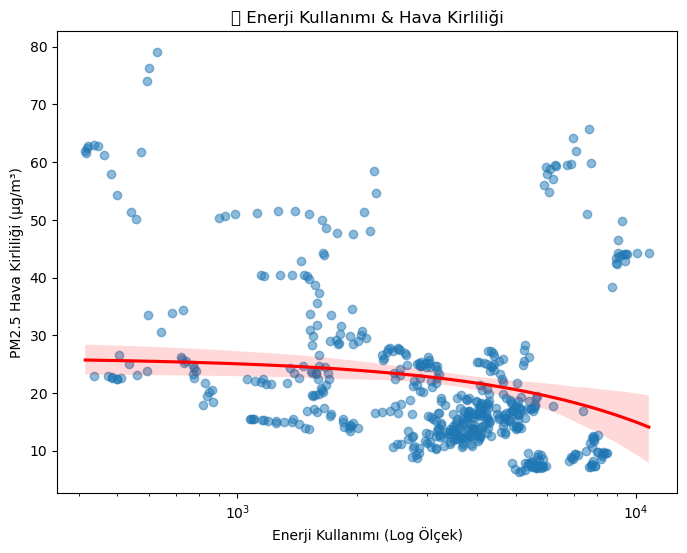

In [77]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="Energy use (kg of oil equivalent per capita)", y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xscale("log")
plt.title("🌿 Enerji Kullanımı & Hava Kirliliği", fontsize=12)
plt.xlabel("Enerji Kullanımı (Log Ölçek)", fontsize=10)
plt.ylabel("PM2.5 Hava Kirliliği (µg/m³)", fontsize=10)
plt.show()


C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127961 (\N{CITYSCAPE}) missing from current font.



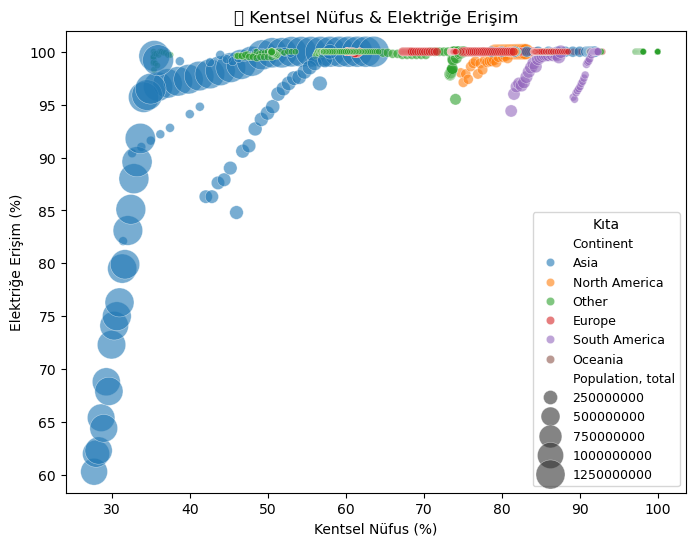

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Urban population (% of total population)", y="Access to electricity (% of population)", size="Population, total", hue="Continent", alpha=0.6, sizes=(20, 500))

plt.title("🏙️ Kentsel Nüfus & Elektriğe Erişim", fontsize=12)
plt.xlabel("Kentsel Nüfus (%)", fontsize=10)
plt.ylabel("Elektriğe Erişim (%)", fontsize=10)
plt.legend(title="Kıta", fontsize=9)
plt.show()


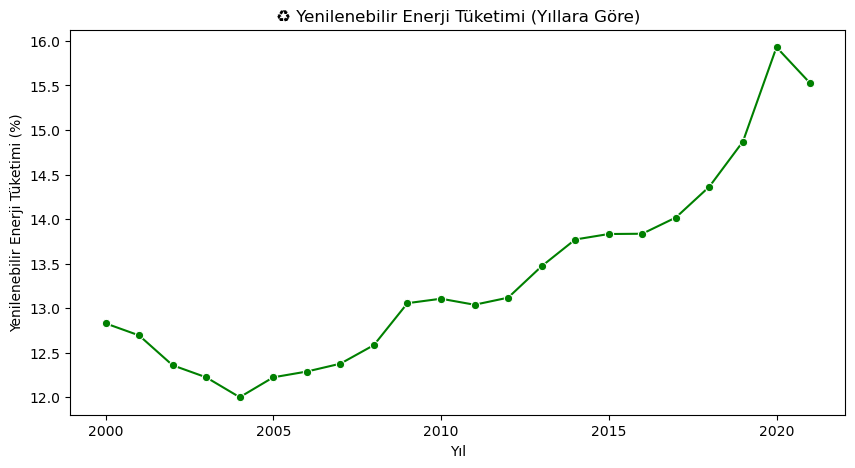

In [79]:
df_trend = df.groupby("Time", as_index=False)["Renewable energy consumption (% of total final energy consumption)"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_trend, x="Time", y="Renewable energy consumption (% of total final energy consumption)", marker="o", color="green")

plt.title("♻️ Yenilenebilir Enerji Tüketimi (Yıllara Göre)", fontsize=12)
plt.xlabel("Yıl", fontsize=10)
plt.ylabel("Yenilenebilir Enerji Tüketimi (%)", fontsize=10)
plt.show()


<Figure size 1000x600 with 0 Axes>

C:\Users\musta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128268 (\N{ELECTRIC PLUG}) missing from current font.



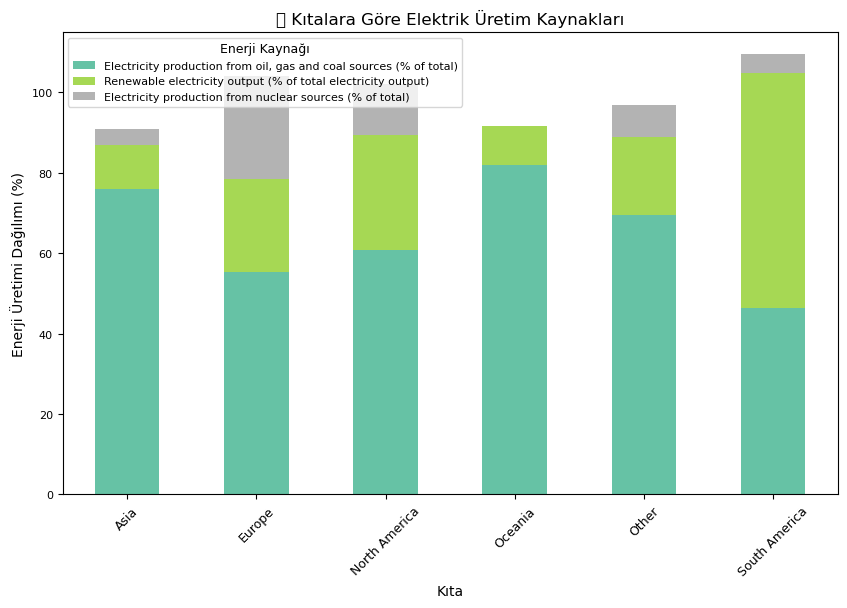

In [80]:

df_energy = df.groupby("Continent", as_index=False)[[
    "Electricity production from oil, gas and coal sources (% of total)",
    "Renewable electricity output (% of total electricity output)",
    "Electricity production from nuclear sources (% of total)"
]].mean()


plt.figure(figsize=(10,6))
df_energy.set_index("Continent").plot(kind="bar", stacked=True, colormap="Set2", figsize=(10,6))


plt.title("🔌 Kıtalara Göre Elektrik Üretim Kaynakları", fontsize=12)
plt.xlabel("Kıta", fontsize=10)
plt.ylabel("Enerji Üretimi Dağılımı (%)", fontsize=10)


plt.xticks(fontsize=9, rotation=45)  
plt.yticks(fontsize=8) 


plt.legend(title="Enerji Kaynağı", fontsize=8, title_fontsize=9)

plt.show()


In [101]:

df[energy_sources] = df[energy_sources].apply(pd.to_numeric, errors="coerce")


In [87]:
df.dropna(subset=energy_sources, inplace=True)


In [85]:

energy_sources = [
    "Electricity production from oil, gas and coal sources (% of total)",
    "Renewable electricity output (% of total electricity output)",
    "Renewable energy consumption (% of total final energy consumption)",
    "Electricity production from nuclear sources (% of total)"
]


df[energy_sources] = df[energy_sources].apply(pd.to_numeric, errors="coerce")


df_clean = df.dropna(subset=energy_sources)


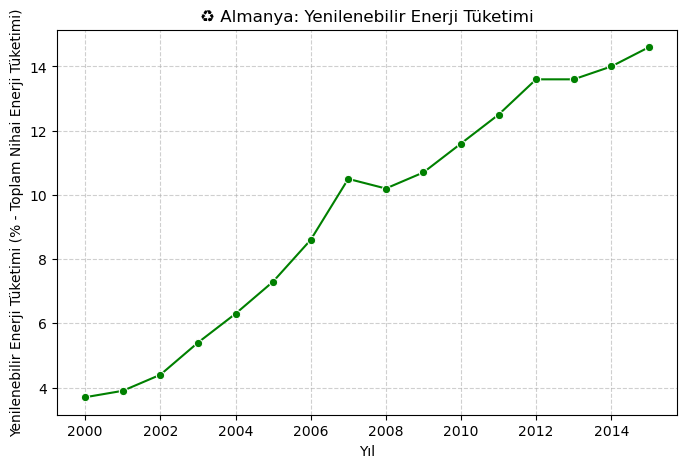

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns


df_germany = df_clean[df_clean["Country Name"] == "Germany"]


plt.figure(figsize=(8, 5))
sns.lineplot(data=df_germany, x="Time", y="Renewable energy consumption (% of total final energy consumption)", marker="o", color="green")


plt.title("♻️ Almanya: Yenilenebilir Enerji Tüketimi", fontsize=12)
plt.xlabel("Yıl", fontsize=10)
plt.ylabel("Yenilenebilir Enerji Tüketimi (% - Toplam Nihai Enerji Tüketimi)", fontsize=10)


plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


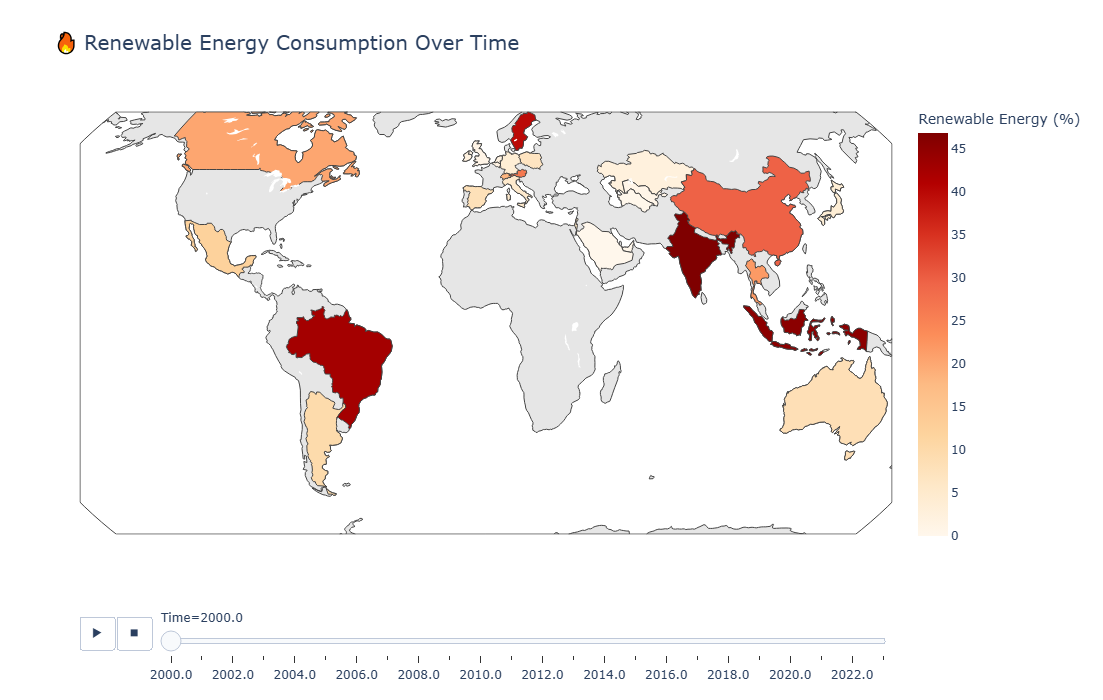

In [91]:
import plotly.express as px


fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Renewable energy consumption (% of total final energy consumption)",
    hover_name="Country Name",
    animation_frame="Time",  
    title="Renewable Energy Consumption Over Time",
    color_continuous_scale=px.colors.sequential.OrRd,  
    projection="natural earth"
)

fig.update_layout(
    width=1200, 
    height=700, 
    coloraxis_colorbar=dict(title="Renewable Energy (%)"),
    title_font=dict(size=20),
    geo=dict(
        showcoastlines=True, 
        showland=True, 
        landcolor="rgb(230, 230, 230)",  
        projection_scale=1.2  
    ),
)

fig.show()


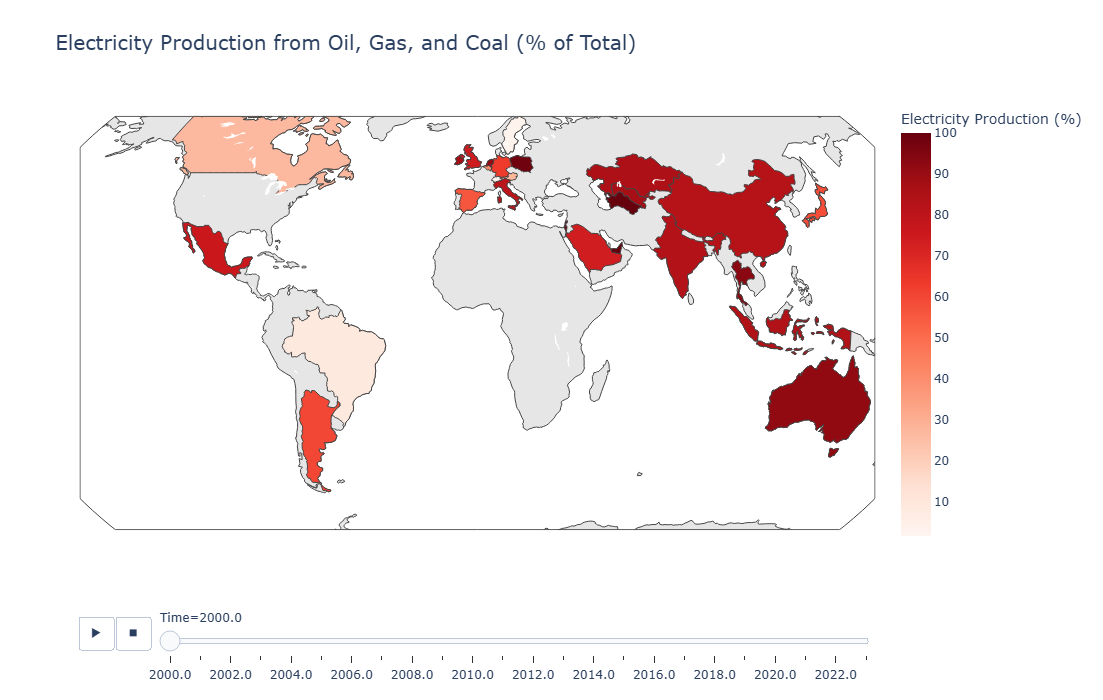

In [102]:
import plotly.express as px


fig = px.choropleth(
    merged,
    locations="ISO_A3",
    color="Electricity production from oil, gas and coal sources (% of total)",
    hover_name="Country Name",
    animation_frame="Time", 
    title="Electricity Production from Oil, Gas, and Coal (% of Total)",
    color_continuous_scale=px.colors.sequential.Reds,  
    projection="natural earth"
)


fig.update_layout(
    width=1200, 
    height=700, 
    coloraxis_colorbar=dict(title="Electricity Production (%)"),
    title_font=dict(size=20),
    geo=dict(
        showcoastlines=True, 
        showland=True, 
        landcolor="rgb(230, 230, 230)", 
        projection_scale=1.2  
    ),
)

fig.show()
